We start with a symmetric homogeneous equation of the tricuspidal quartic and we construct an affine one where the line at infinity is tangent to a cusp and the projection point is the intersection of the tangent lines at the cusps. 

In [1]:
R3.<x, y, z> = QQ[]
R2.<u, v> = QQ[]
f = (x + y + z)^2 - 4 * (x * y + y * z + x * z)
f = f(x=y * z, y=z * x, z=x * y)
f = f(x=x + y, z=y + z)
g = f(x=u, y=v, z=1)
g

-4*u*v^3 - 3*v^4 - 6*u*v^2 - 4*v^3 + u^2

In [2]:
g.discriminant(v).factor()

(-6912) * u^4 * (u - 1)^4

A real picture of the affine curve is useful since all the non-transversal vertical lines are real: the tangent lines to the cusps.

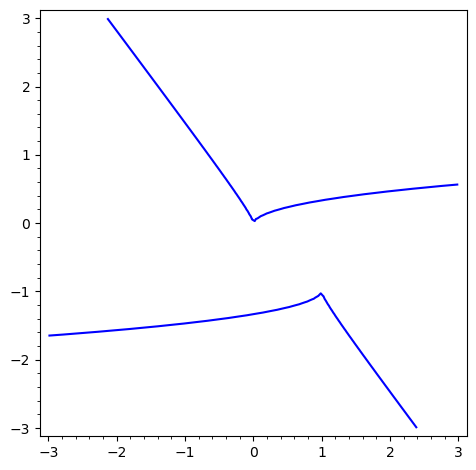

In [3]:
P = implicit_plot(g, (u, -3, 3), (v, -3, 3))
P

In order to obtain the braid monodromy, we need to track the real part of the complex solutions. To do this we define a function `sum_roots: Let $F\in\mathbb{C}[V]$ to get a polynomial $F_1$ having as roots the pairwise semi-sum of the roots of $F$. 

In [4]:
def sum_roots(F):
    if F == 0:
        return 0
    n = F.degree()
    ll = F.leading_coefficient()
    if not ll.is_unit():
        print("Cannot convert to a monic polynomial")
    F = F / ll
    cfs = [(-1)^(j + n) * a for j, a in enumerate(F.list())]
    sym = SymmetricFunctions(QQ).elementary()
    Rs = PolynomialRing(QQ, 's', n)
    Rst.<t> = Rs[]
    pol = prod(t - a0 - b0 for a0, b0 in Combinations(Rs.gens(), 2))
    cfs1 = [list(sym.from_polynomial(Rs(m))) for m in pol.list()]
    lst = []
    for term in cfs1:
        res = 0
        for mon, cf in term:
            if not mon or max(mon) < n + 1:
                res += cf * prod(cfs[n - j] for j in mon)
        lst.append(res)
    lst = [2^(j - n.binomial(2)) * m for j, m in enumerate(lst)]
    return F.parent()(lst)

 We convert $g$ into a polynomial in $\mathbb{C}[t_0][t_1]$ to obtain the polynomial $h$, and we draw both polynomials,  the red branch passing through the cusps correspond to the real parts of the complex imaginary solutions.

In [5]:
R1a.<t0> = QQ[]
R1b.<t1> = R1a[]
g0 = -g(u=t0, v=t1) / 3
h0 = sum_roots(g0)
h = sum(m(t0=u) * v^j for j, m in enumerate(h0.list()))

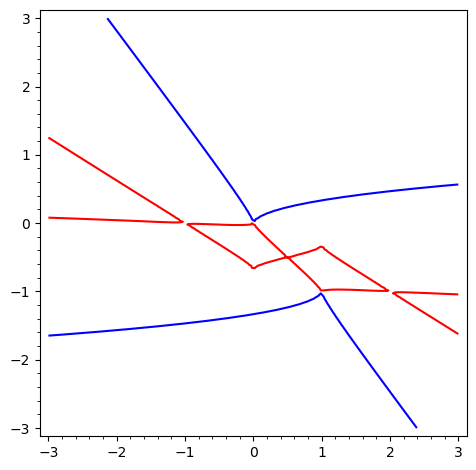

In [6]:
Q = implicit_plot(h, (u, -3, 3), (v, -3, 3), color='red')
P + Q

This picture is the source of the right-hand side of Figure 1. Choosing as base vertical line one between the two cusps, it is not hard to see that which are the associated braids.

In [7]:
B = BraidGroup(4)
b1 = B((2, 1))
s1 = b1^2
b2 = B((2, 3))
s2 = b2^2

We check that the local braid at infinity corresponds to a cusp tangent to the fiber.

In [8]:
B.delta()^2 == s1 * s2 * b1 * s2 / b1

True

We want to compute the relations of in the normal subgroups of the distinct semidirect decompositions. For the one in Remark 1.3 there are no relations since it is a free group.
For the one in Corollary 2.2 we compute the relations acquired by the commutation of the two braid actions.

In [9]:
F4 = FreeGroup(4)
for g in F4.gens():
    g0 = (g * s1 * s2) / (g * s2 * s1)
    aa = g0.Tietze()    
    while len(aa) > 1 and aa[0] + aa[-1] == 0:
        
        aa = aa[1:  -1]
    print(aa)

(4, 3, 4, -3, -4, -3)
(3, 4, 3, -4, -3, -2, 1, 2, 3, 4, -3, -4, -3, 4, 1, -2, -1, -4)
(3, 4, 3, -4, -3, -4)
(2, 1, 2, -1, -2, -1)


It is easily seen that only the last two relations count:
$$
c_3\cdot c_4\cdot c_3 = c_4\cdot c_3\cdot c_4,\qquad
c_1\cdot c_2\cdot c_1 = c_2\cdot c_1\cdot c_2\
$$
We continue with Proposition 4.1, adding the relations coming from the fact that the braid actions must be of order $2$.

In [10]:
for g in F4.gens():
    g0 = (g * s2) / (g / s2)
    aa = g0.Tietze()    
    while len(aa) > 1 and aa[0] + aa[-1] == 0:
        aa = aa[1:  -1]
    print(aa)

()
(2, 3, 4, 3, -4, -3, -2, -4)
(2, 3, 4, -3, -2, -4, -3, -2, 3, 4)
(2, -4, -3, -2, -3, 2, 3, 4)


Using the previous relations, the first non trivial one becomes:
- $[c_2, c_4] = 1$.
  
Using also this one, the last relation becomes:
- $[c_2, c_3] = 1$.
  
These relations imply the second non trivial one.

In [11]:
for g in F4.gens():
    g0 = (g * s1) / (g / s1)
    aa = g0.Tietze()    
    while len(aa) > 1 and aa[0] + aa[-1] == 0:
        aa = aa[1:  -1]
    print(aa)

(1, 2, 3, -2, -1, -3, -2, 3)
(1, 2, 1, -2, -1, -3, -2, -3, 2, 3)
(1, 2, -1, -3, -2, -1, 2, 3)
()


The second relation is a consequence of the previous ones and the other two ones are equivalent. With a change of variable we obtain the relation in the statement of Proposition 4.1. We are going to check the statement in Remark 4.2.

In [12]:
rlk = [(3, 4, 3, -4, -3, -4), (2, 1, 2, -1, -2, -1), (2, 3, 2, -3, -2, -3)]
rlk += [(1, 3, -1, -3), (2, 4, -2, -4), 2 * (2, 1, 3, 4)]
G = F4 / rlk
G.abelian_invariants()

(8,)

$G/G'\cong\mathbb{Z}/8$.

In [13]:
G1 = libgap(G).DerivedSubgroup()
G1.AbelianInvariants()

[ 3 ]

$G'/G''\cong\mathbb{Z}/3$.

In [14]:
G2 = G1.DerivedSubgroup()
ab2 = G2.AbelianInvariants()
set(ab2), len(ab2)

({2}, 6)

$G''/G'''\cong(\mathbb{Z}/2)^6$.

In [15]:
G3 = G2.DerivedSubgroup()
ab3 = G3.AbelianInvariants()
ab3 = [a for a in ab3]
aux = set(ab3)
{a:ab3.count(a) for a in aux}

{4: 1, 0: 9, 2: 5}

$G'''/G^{(4)}\cong\mathbb{Z}^9\oplus(\mathbb{Z}/2)^5\oplus\mathbb{Z}/4$.